In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd

In [25]:
df = pd.read_csv("fortune500_policies.csv")

In [26]:
def plot_hist(dist):
    sns.histplot(dist,stat="density")
    plt.show()

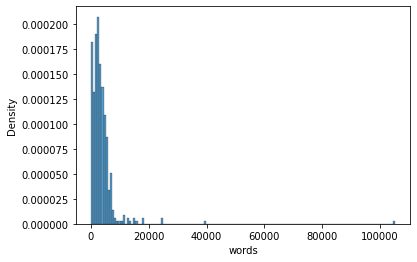

In [27]:
plot_hist(df["words"])

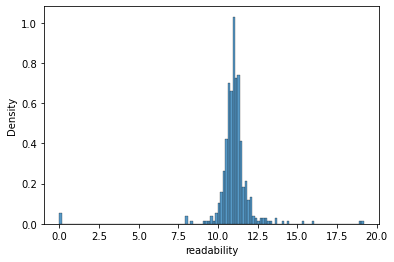

In [28]:
plot_hist(df["readability"])

In [29]:
df = pd.read_csv("indian_policies.csv")

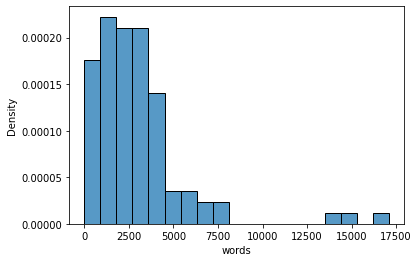

In [30]:
plot_hist(df["words"])

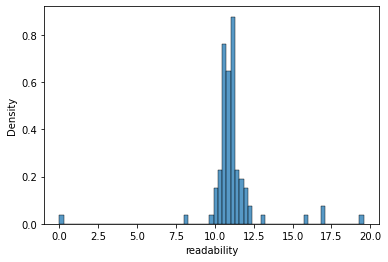

In [31]:
plot_hist(df["readability"])

In [32]:
import json

In [33]:
with open("indian.json") as f:
    indian = json.load(f)

In [34]:
with open("fortune500.json") as f:
    fortune = json.load(f)

In [35]:
labels=['First Party Collection/Use',
          'Third Party Sharing/Collection',
          'Other',
          'International and Specific Audiences',
          'Data Security',
          'User Choice/Control',
          'User Access, Edit and Deletion',
          'Data Retention',
          'Policy Change',
          'Do Not Track']

In [36]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
        bars.append(bar[0])
    if legend:
        ax.legend(bars, data.keys())
    

In [40]:
data ={l:[(indian[l]/97)*100,(fortune[l]/485)*100]for l in labels}

In [41]:
data

{'First Party Collection/Use': [86.5979381443299, 92.16494845360825],
 'Third Party Sharing/Collection': [83.50515463917526, 87.83505154639175],
 'Other': [93.81443298969072, 96.70103092783505],
 'International and Specific Audiences': [44.329896907216494,
  82.4742268041237],
 'Data Security': [84.5360824742268, 80.61855670103093],
 'User Choice/Control': [77.31958762886599, 82.06185567010309],
 'User Access, Edit and Deletion': [61.855670103092784, 68.24742268041237],
 'Data Retention': [50.51546391752577, 45.154639175257735],
 'Policy Change': [81.44329896907216, 77.7319587628866],
 'Do Not Track': [0.0, 0.0]}

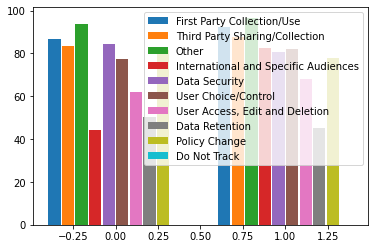

In [43]:
fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.show()